In [70]:
import os

#data downloaded from https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
horses_datadir = os.path.join('../data/horse-or-human/horses')
humans_datadir = os.path.join('../data/horse-or-human/humans')

horses_names = os.listdir(horses_datadir)
humans_names = os.listdir(humans_datadir)

print (horses_names[:10])
print(humans_names[:10])

['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png', 'horse22-4.png', 'horse19-2.png', 'horse24-2.png', 'horse37-8.png', 'horse02-1.png']
['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png', 'human05-22.png', 'human02-03.png', 'human02-17.png', 'human15-27.png', 'human12-12.png']


In [72]:
# total images
print ("horses data = {0} , humans data = {1} " .format(len(horses_names),len(humans_names)))

horses data = 500 , humans data = 527 


['../data/horse-or-human/horses/horse43-5.png', '../data/horse-or-human/horses/horse06-5.png', '../data/horse-or-human/horses/horse20-6.png', '../data/horse-or-human/horses/horse04-7.png', '../data/horse-or-human/horses/horse41-7.png', '../data/horse-or-human/horses/horse22-4.png', '../data/horse-or-human/horses/horse19-2.png', '../data/horse-or-human/horses/horse24-2.png']
['../data/horse-or-human/humans/human17-22.png', '../data/horse-or-human/humans/human10-17.png', '../data/horse-or-human/humans/human10-03.png', '../data/horse-or-human/humans/human07-27.png', '../data/horse-or-human/humans/human09-22.png', '../data/horse-or-human/humans/human05-22.png', '../data/horse-or-human/humans/human02-03.png', '../data/horse-or-human/humans/human02-17.png']


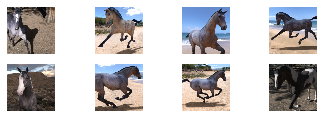

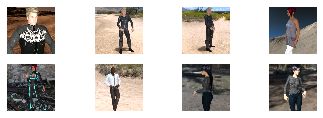

In [73]:
#check few images
import matplotlib.pyplot as plt 
import matplotlib.image as img 

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 8

#f, axarr = plt.subplots(1,4)
next_horse_pic = [os.path.join(horses_datadir,fname ) for fname in horses_names[pic_index-8:pic_index]]
next_human_pic = [os.path.join(humans_datadir,fname ) for fname in humans_names[pic_index-8:pic_index]]
print(next_horse_pic)
print(next_human_pic)
i = 0
for img_path in next_horse_pic  :
    image = img.imread(img_path)
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis("off")
    plt.imshow(image)
    i = i+ 1
plt.figure()
i =0
for img_path in next_human_pic  :
    image = img.imread(img_path)
    sp = plt.subplot(nrows,ncols,i+1)
    sp.axis("off")
    plt.imshow(image)
    i = i+ 1

plt.show()


In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    '../data/horse-or-human/',
    target_size = (300,300),
    batch_size = 128,
    class_mode = 'binary'
)

Found 1031 images belonging to 3 classes.


In [49]:
# define model
import tensorflow as tf 

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation=tf.nn.relu, input_shape=(300,300,3) ),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dense(1,activation=tf.nn.sigmoid)

])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 33, 33, 64)       

In [75]:
model.compile(loss='binary_crossentropy',
    optimizer= tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=['accuracy']
    )
history = model.fit(train_generator,steps_per_epoch=8,epochs=15,verbose=2)

  ...
    to  
  ['...']
Train for 8 steps
Epoch 1/15
8/8 - 26s - loss: 1.3854 - accuracy: 0.8981
Epoch 2/15
8/8 - 28s - loss: 0.0811 - accuracy: 0.9805
Epoch 3/15
8/8 - 24s - loss: 0.0428 - accuracy: 0.9922
Epoch 4/15
8/8 - 26s - loss: 0.0832 - accuracy: 0.9701
Epoch 5/15
8/8 - 26s - loss: -2.2127e-02 - accuracy: 0.9900
Epoch 6/15
8/8 - 27s - loss: -6.6554e-02 - accuracy: 0.9956
Epoch 7/15
8/8 - 26s - loss: 1.1447 - accuracy: 0.8638
Epoch 8/15
8/8 - 31s - loss: -2.7179e-02 - accuracy: 0.9912
Epoch 9/15
8/8 - 24s - loss: -4.3601e-02 - accuracy: 0.9745
Epoch 10/15
8/8 - 26s - loss: 0.1824 - accuracy: 0.9192
Epoch 11/15
8/8 - 33s - loss: 0.1219 - accuracy: 0.9635
Epoch 12/15
8/8 - 29s - loss: 0.0248 - accuracy: 0.9347
Epoch 13/15
8/8 - 26s - loss: -2.7017e-01 - accuracy: 0.9734
Epoch 14/15
8/8 - 25s - loss: -4.6233e-01 - accuracy: 0.9590
Epoch 15/15
8/8 - 26s - loss: -5.6559e-01 - accuracy: 0.9457


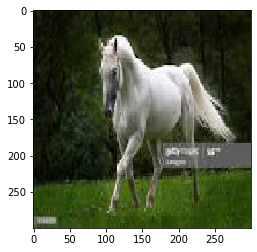

In [104]:
from tensorflow.keras.preprocessing import image
img_path = '../data/horse-or-human/testImages/horse_test.jpeg'
#image = img.imread(img_path)
inp_image = image.load_img(img_path, target_size=(300, 300))
#print (len(inp_image[1]))
plt.imshow(inp_image)
plt.show()

In [102]:
import numpy as np 

x = image.img_to_array(inp_image)
x = np.expand_dims(x, axis=0)
inp_array  = np.vstack([x])
classes = model.predict(inp_array)
print (classes[0])

if classes[0]>0.5:
    print(img_path + " is a human")
else:
    print(img_path + " is a horse")


[1.]
../data/horse-or-human/testImages/horse_test.jpeg is a human
